# Adafruit Blinka + PCT2075

In [3]:
# Python Software Package Installation
import sys
!{sys.executable} -m pip install adafruit-blinka adafruit-circuitpython-msa301 hidapi ipympl adafruit-circuitpython-pct2075

# Set an Environment Variable so Adafruit Blinka knows we're using the MCP2221
import os
os.environ["BLINKA_MCP2221"] = "1"

Verify the cell below returns the temperature before proceeding to the graph cell.

In [6]:
import board
import busio
import adafruit_pct2075
i2c = busio.I2C(board.SCL, board.SDA)

pct = adafruit_pct2075.PCT2075(i2c)
print('Temperature: {}*C'.format(pct.temperature))

Temperature: 25.75*C


This cell will graph the temperature values over time

<IPython.core.display.Javascript object>


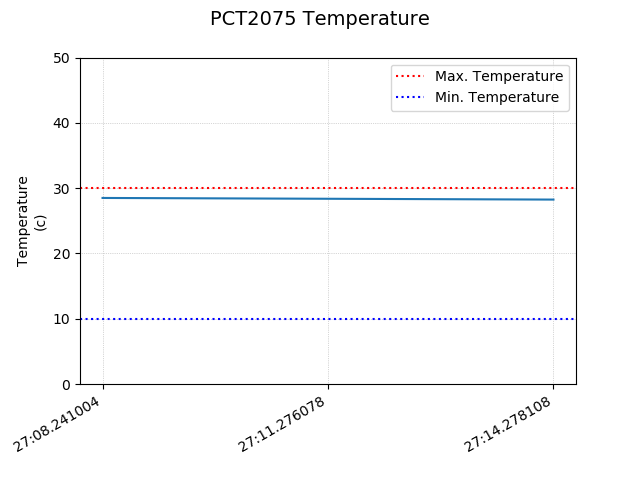

In [10]:
from datetime import datetime
import matplotlib.pyplot as plt
from collections import deque
from matplotlib import animation, rc
%matplotlib notebook

# How many sensor samples we want to store
HISTORY_SIZE = 100

# Graph update interval (in seconds)
UPDATE_GRAPH = 3

# Global x-axis array
x_time = deque(maxlen=HISTORY_SIZE)

# Temperature data
temp_data = deque(maxlen=HISTORY_SIZE)

# Create new plot
fig, ax = plt.subplots()

# Global title
fig.suptitle("PCT2075 Temperature", fontsize=14)

def animate(i):
    # Read the temperature sensor and add the value to the temp_data array
    temp_data.append(pct.temperature)
    
    # Grab the datetime, auto-range based on length of accel_x array
    x_time.append(datetime.now().strftime('%M:%S.%f'))

    # Clear axis prior to plotting
    ax.cla()
    
    # Constrain the Y-axis
    plt.ylim(top=50,bottom=0)

    # Y-Axis label
    plt.ylabel('Temperature\n(c)')
    
    # Rotate and align the x-axis tick labels
    fig.autofmt_xdate()
    ax.grid(True, linestyle=':', linewidth=0.5)
    f = ax.plot(x_time, temp_data)
    
    # Add a horizontal minimum line across the X-axis
    p2 = plt.axhline(y=30, color='r', linestyle=':')
    
    # Add a horizontal maximum line across the X-axis
    p3 = plt.axhline(y=10, color='b', linestyle=':')
    
    ax.legend((p2, p3), ('Max. Temperature','Min. Temperature'))


# Update graph every 125ms
ani = animation.FuncAnimation(plt.gcf(), animate, interval=UPDATE_GRAPH*1000)